In [1]:
# 在计算机的内存中一次性存储多个数值. 多个数值有一定的规律, 从0~11的整数数值
# => 选择张量数据结构 => 确定张量的维度, 形状和数据类型
t = torch.arange(start=0, end=12, step=1, dtype=torch.float32).reshape(6, 2)
t

tensor([[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.],
        [ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]])

In [3]:
type(t.max(dim=0))

torch.return_types.max

In [4]:
t.max(dim=0)

torch.return_types.max(
values=tensor([10., 11.]),
indices=tensor([5, 5]))

In [5]:
t.max(dim=0)[0]

tensor([10., 11.])

In [6]:
# 在一个二维张量中, 计算每一列的最大值. 需要变化的索引是指定列中的行, 因此指定dim=0
t_max = t.max(dim=0)[0]
t_max

tensor([10., 11.])

In [7]:
# 在一个二维张量中, 计算每一列的最小值. 需要变化的索引是指定列中的行, 因此指定dim=0
# 没有指定的维度被认为是指定的. 需要保留的
t_min = t.min(dim=0)[0]
t_min

tensor([0., 1.])

In [8]:
# 计算最值归一化的结果
(t - t_min) / (t_max - t_min)

tensor([[0.0000, 0.0000],
        [0.2000, 0.2000],
        [0.4000, 0.4000],
        [0.6000, 0.6000],
        [0.8000, 0.8000],
        [1.0000, 1.0000]])

In [9]:
# 在计算机的内存中一次性存储多个数值. 多个数值存在规律, 从0-11的整数数值
# => 选择张量数据结构: 确定张量的维度ndim, 形状shape以及数据类型dtype
t = torch.arange(start=0, end=12, step=1, dtype=torch.float32).reshape(6, 2)
t

tensor([[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.],
        [ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]])

In [13]:
# 按照列将每一列视为一个随机变量, 计算随机变量的一组样本的均值 => 按照列计算均值
# 因此行所在的维度是the dimension to reduce, 设置dim参数为行所在的维度索引
t_mean = t.mean(dim=0)

In [12]:
# 按照列将每一列视为一个随机变量, 计算随机变量的一组样本的标准差 => 按照列计算标准差
# 因此行所在的维度是the dimension to reduce, 设置dim参数为行所在的维度索引
t_std = t.std(dim=0)

In [14]:
# 计算均值方差归一化的结果
(t - t_mean) / t_std

tensor([[-1.3363, -1.3363],
        [-0.8018, -0.8018],
        [-0.2673, -0.2673],
        [ 0.2673,  0.2673],
        [ 0.8018,  0.8018],
        [ 1.3363,  1.3363]])

In [16]:
def z_score_normalization(X):
    """计算一个特征张量中的各个特征的数据经过均值方差归一化后的结果
    @param data: 二维特征张量(行-样本, 列-特征变量)
    """
    # 计算二维特征张量中每一个特征变量的均值
    mean_ = X.mean(dim=0)
    # 计算二维特征张量中每一个特征变量的标准差
    std_ = X.std(dim=0)
    # 计算各个特征的数据进行(公式: 均值方差归一化)的结果
    return (X - mean_) / std_

假设观测特征变量和观测标签之间的自然规律因果关系为: $y = 2x_1^2 - x_2^2$

In [37]:
torch.manual_seed(1998)

# 加载原始数据集
X, y = tensorGenReg(w=[2, -1], degree=2, bias=False)

# 对原始数据集进行 数据科学手段 处理 => data transformation
X_normalized = z_score_normalization(X=X)

# 如果深度神经网络模型需要学习的数据集的特征变量和标签是分开存储的, 则先将特征变量和标签按照样本的编号进行合并
# 对于合并后的完整的数据集, 先根据指定的比例将其划分为训练数据集和测试数据集
# 再根据指定的样本容量将训练数据集和测试数据集分别划分为若干个互不相交的子数据集
dataset_train, dataset_test = split_loader(X=X, y=y)
dataset_normalized_train, dataset_normalized_test = split_loader(X=X_normalized, y=y)

In [38]:
X

tensor([[-0.0227, -0.7850],
        [ 2.2893, -0.8654],
        [-1.2024, -2.1578],
        ...,
        [-1.4185,  0.9334],
        [-1.6269, -0.4362],
        [-0.0921, -1.7355]])

In [39]:
torch.manual_seed(1998)

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetSigmoid3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetSigmoid3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第二层-> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

In [49]:
torch.manual_seed(1998)

# 实例化模型, 完成模型的参数默认随机初始化
net = GeoffNetSigmoid3()  # 学习原始的数据集

# 逐层完成模型的参数的Xavier初始化
net_layers = list(net.modules())[1:]
for layer in net_layers:
    # print(layer)
    nn.init.xavier_uniform_(layer.weight)

# 模型的训练
n_epochs = 40
losses_train, losses_test = calc_train_test_losses(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs, 
                                                   model=net, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net.parameters(), lr=0.03), 
                                                   task="reg", evaluation=calc_mse)

net_normalized = GeoffNetSigmoid3()  # 学习经过数据科学手段处理的数据集

net_normalized_layers = list(net_normalized.modules())[1:]
for layer in net_normalized_layers:
    # print(layer)
    nn.init.xavier_uniform_(layer.weight)

losses_normalized_train, losses_normalized_test = calc_train_test_losses(dataset_train=dataset_normalized_train, dataset_test=dataset_normalized_test, n_epochs=n_epochs, 
                                                   model=net_normalized, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_normalized.parameters(), lr=0.03), 
                                                   task="reg", evaluation=calc_mse)

Parameter containing:
tensor([[-0.6394,  0.7062],
        [ 0.5262, -0.8829],
        [ 0.5739, -0.5062],
        [ 0.8653, -0.1151]], requires_grad=True)

Parameter containing:
tensor([[-0.3952,  0.7099, -0.5857,  0.8267],
        [ 0.2391,  0.1294, -0.0147,  0.5972],
        [ 0.2366, -0.3436, -0.8361, -0.7570],
        [-0.4332, -0.5939, -0.5715,  0.1609]], requires_grad=True)

Parameter containing:
tensor([[ 0.5812, -0.8558, -0.6368, -0.0786],
        [ 0.3237, -0.0114, -0.7431,  0.8135],
        [ 0.5034, -0.0908,  0.2819,  0.0631],
        [-0.8572,  0.5685,  0.5593, -0.3603]], requires_grad=True)

Parameter containing:
tensor([[ 0.2435, -1.0919,  0.7609, -0.1757]], requires_grad=True)

Parameter containing:
tensor([[ 0.6424,  0.8773],
        [ 0.4497, -0.4276],
        [-0.3242,  0.6381],
        [-0.6982,  0.6360]], requires_grad=True)

Parameter containing:
tensor([[-0.2354, -0.6717, -0.3607,  0.2107],
        [ 0.8007,  0.2232, -0.6064, -0.8343],
        [ 0.6614,  0.0187, -0.1041,  0.3385],
        [ 0.7283, -0.6175,  0.5890,  0.0313]], requires_grad=True)

Parameter containing:
tensor([[ 0.1130, -0.4843, -0.3790,  0.3308],
        [-0.1004,  0.7175, -0.2898,  0.7725],
        [-0.3527,  0.5204,  0.5610, -0.7914],
        [-0.6668, -0.6678, -0.6322,  0.7672]], requires_grad=True)

Parameter containing:
tensor([[-0.3955,  0.4186,  0.9511, -0.9092]], requires_grad=True)

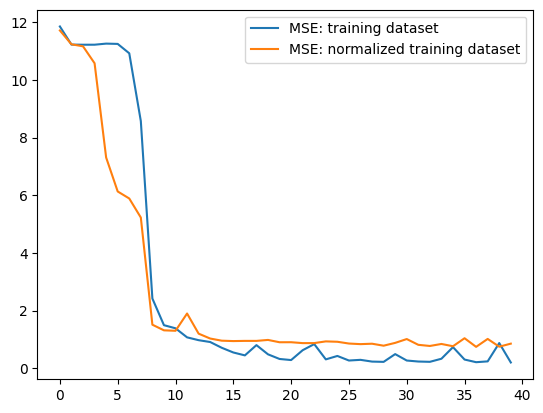

In [50]:
plt.plot(list(range(n_epochs)), losses_train, label="MSE: training dataset")
plt.plot(list(range(n_epochs)), losses_normalized_train, label="MSE: normalized training dataset")
plt.legend(loc="upper right")
plt.show()

In [43]:
X_normalized

tensor([[-0.0564, -0.7659],
        [ 2.2238, -0.8455],
        [-1.2200, -2.1240],
        ...,
        [-1.4331,  0.9341],
        [-1.6387, -0.4209],
        [-0.1249, -1.7063]])

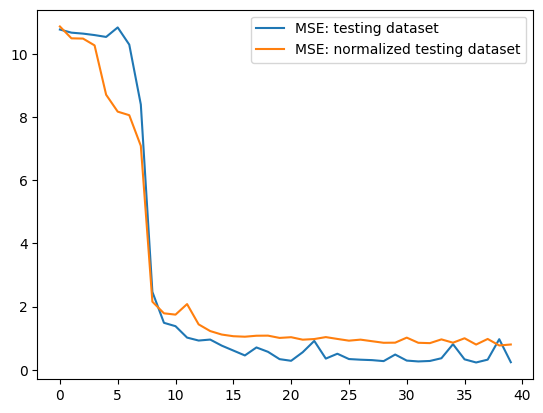

In [51]:
plt.plot(list(range(n_epochs)), losses_test, label="MSE: testing dataset")
plt.plot(list(range(n_epochs)), losses_normalized_test, label="MSE: normalized testing dataset")
plt.legend(loc="upper right")
plt.show()

In [52]:
torch.manual_seed(1998)

# 实例化模型, 完成模型的参数默认随机初始化
net = GeoffNetSigmoid3()  # 学习原始的数据集

# 逐层完成模型的参数的Xavier初始化
net_layers = list(net.modules())[1:]
for layer in net_layers:
    # print(layer)
    nn.init.xavier_uniform_(layer.weight)

# 模型的训练
n_epochs = 5
losses_train, losses_test = calc_train_test_losses(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs, 
                                                   model=net, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net.parameters(), lr=0.03), 
                                                   task="reg", evaluation=calc_mse)

net_normalized = GeoffNetSigmoid3()  # 学习经过数据科学手段处理的数据集

net_normalized_layers = list(net_normalized.modules())[1:]
for layer in net_normalized_layers:
    # print(layer)
    nn.init.xavier_uniform_(layer.weight)

losses_normalized_train, losses_normalized_test = calc_train_test_losses(dataset_train=dataset_normalized_train, dataset_test=dataset_normalized_test, n_epochs=n_epochs, 
                                                   model=net_normalized, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_normalized.parameters(), lr=0.03), 
                                                   task="reg", evaluation=calc_mse)

Parameter containing:
tensor([[-0.6394,  0.7062],
        [ 0.5262, -0.8829],
        [ 0.5739, -0.5062],
        [ 0.8653, -0.1151]], requires_grad=True)

Parameter containing:
tensor([[-0.3952,  0.7099, -0.5857,  0.8267],
        [ 0.2391,  0.1294, -0.0147,  0.5972],
        [ 0.2366, -0.3436, -0.8361, -0.7570],
        [-0.4332, -0.5939, -0.5715,  0.1609]], requires_grad=True)

Parameter containing:
tensor([[ 0.5812, -0.8558, -0.6368, -0.0786],
        [ 0.3237, -0.0114, -0.7431,  0.8135],
        [ 0.5034, -0.0908,  0.2819,  0.0631],
        [-0.8572,  0.5685,  0.5593, -0.3603]], requires_grad=True)

Parameter containing:
tensor([[ 0.2435, -1.0919,  0.7609, -0.1757]], requires_grad=True)

Parameter containing:
tensor([[-0.8605, -0.0654],
        [-0.7702, -0.8906],
        [ 0.5879, -0.5628],
        [-0.9248,  0.0381]], requires_grad=True)

Parameter containing:
tensor([[-0.6663, -0.3207, -0.3093, -0.0674],
        [-0.7071, -0.5120,  0.2241,  0.7620],
        [-0.4535,  0.2348, -0.5158, -0.8143],
        [ 0.7270, -0.6216,  0.4438,  0.0167]], requires_grad=True)

Parameter containing:
tensor([[-0.8162, -0.0225,  0.5056,  0.4128],
        [ 0.2814,  0.0197,  0.2382,  0.4281],
        [ 0.1924, -0.6558, -0.7627,  0.4700],
        [-0.5543, -0.3009,  0.8359, -0.0776]], requires_grad=True)

Parameter containing:
tensor([[ 0.8336, -0.7094,  0.0736,  0.4116]], requires_grad=True)

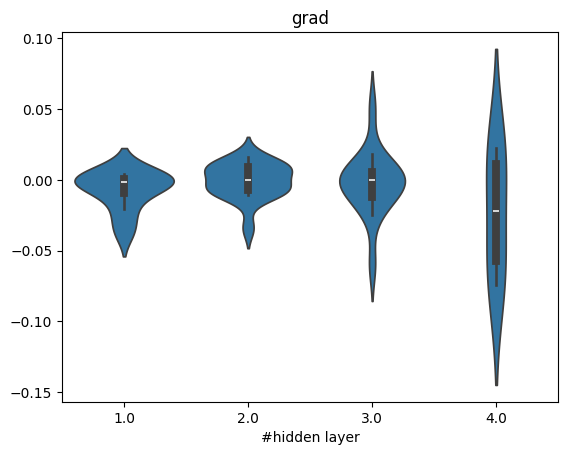

In [53]:
plot_violin_param(model=net, param="grad")

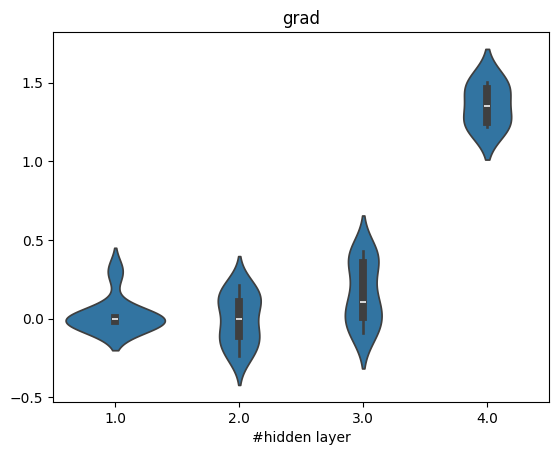

In [54]:
plot_violin_param(model=net_normalized, param="grad")

In [56]:
torch.manual_seed(1998)

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetTanh2(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4], out_features=1, bias=True):
        super(GeoffNetTanh2, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[1], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第二层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

In [57]:
torch.manual_seed(1998)

# 实例化模型, 完成模型的参数默认随机初始化
net_normalized1 = GeoffNetTanh2()  # 学习原始的数据集

# 逐层完成模型的参数的Xavier初始化
net_layers = list(net_normalized1.modules())[1:]
for layer in net_layers:
    # print(layer)
    nn.init.xavier_uniform_(layer.weight)

# 模型的训练
n_epochs = 5
losses_normalized_train1, losses_normalized_test1 = calc_train_test_losses(dataset_train=dataset_normalized_train, dataset_test=dataset_normalized_test, n_epochs=n_epochs, 
                                                   model=net_normalized1, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_normalized1.parameters(), lr=0.03), 
                                                   task="reg", evaluation=calc_mse)

# 实例化模型, 完成模型的参数默认随机初始化
net_normalized2 = GeoffNetTanh2()  # 学习原始的数据集

# 逐层完成模型的参数的Xavier初始化
net_layers = list(net_normalized2.modules())[1:]
for layer in net_layers:
    # print(layer)
    nn.init.xavier_uniform_(layer.weight)

# 模型的训练
n_epochs = 50
losses_normalized_train2, losses_normalized_test2 = calc_train_test_losses(dataset_train=dataset_normalized_train, dataset_test=dataset_normalized_test, n_epochs=n_epochs, 
                                                   model=net_normalized2, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_normalized2.parameters(), lr=0.03), 
                                                   task="reg", evaluation=calc_mse)

Parameter containing:
tensor([[ 0.5219, -0.0688],
        [-0.9150, -0.2464],
        [-0.0315,  0.9187],
        [ 0.4492, -0.1713]], requires_grad=True)

Parameter containing:
tensor([[ 0.7047,  0.2135,  0.5112,  0.2283],
        [-0.6570, -0.4698, -0.3553, -0.4517],
        [ 0.7616, -0.1631,  0.3660,  0.6602],
        [-0.5537,  0.6116,  0.4557, -0.7646]], requires_grad=True)

Parameter containing:
tensor([[ 0.6287, -0.5545,  0.9479, -0.1261]], requires_grad=True)

Parameter containing:
tensor([[ 0.6978, -0.2366],
        [-0.1925,  0.5634],
        [ 0.8855, -0.0591],
        [-0.9653,  0.0404]], requires_grad=True)

Parameter containing:
tensor([[-0.3382,  0.0873,  0.2208, -0.3882],
        [ 0.7153, -0.4122,  0.6043, -0.4147],
        [ 0.0665, -0.2591,  0.2666,  0.4843],
        [-0.7884,  0.3004,  0.8339, -0.5716]], requires_grad=True)

Parameter containing:
tensor([[-1.0007, -0.5241,  0.6986,  0.5250]], requires_grad=True)

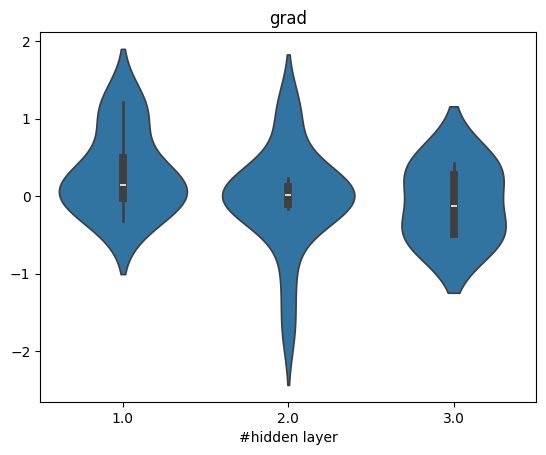

In [59]:
plot_violin_param(model=net_normalized1, param="grad")

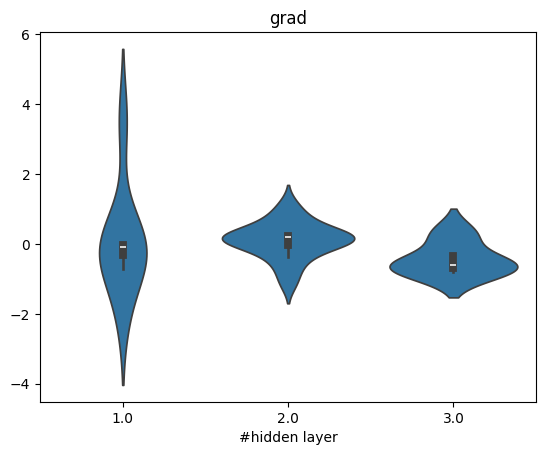

In [60]:
plot_violin_param(model=net_normalized2, param="grad")

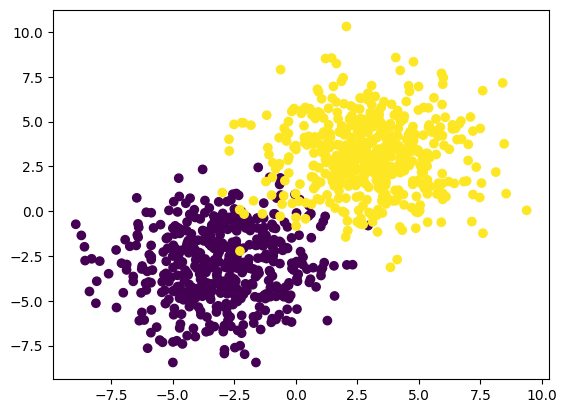

In [61]:
torch.manual_seed(1998)

X, y = tensorGenCla(num_classes=2, deg_dispersion=[6, 2])

# 查看数据集中的样本点在特征空间中的分布情况
plt.scatter(X[:, 0], X[:, 1], c=y)

In [62]:
X

tensor([[-3.0454, -4.5700],
        [ 1.5785, -4.7307],
        [-5.4048, -7.3155],
        ...,
        [ 5.1379,  2.8613],
        [ 2.0587,  4.3684],
        [ 4.0878,  5.3333]])

In [63]:
X_normalized = z_score_normalization(X=X)
X_normalized

tensor([[-0.8300, -1.2600],
        [ 0.4420, -1.3040],
        [-1.4790, -2.0104],
        ...,
        [ 1.4211,  0.7710],
        [ 0.5741,  1.1828],
        [ 1.1322,  1.4465]])

<Axes: >

<Axes: >

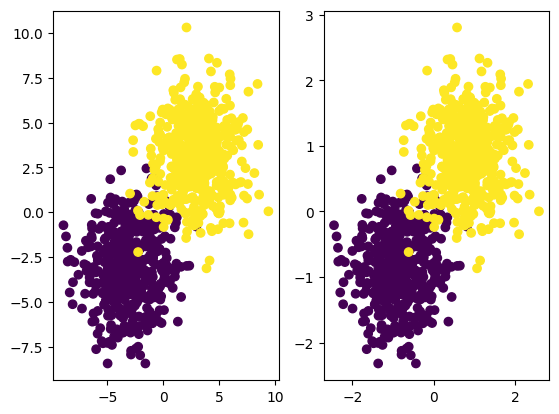

In [65]:
# 查看数据集中的样本点在特征空间中的分布情况
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.subplot(122)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y)
plt.show()

<Axes: >

Text(0.5, 1.0, 'original sample distribution')

<Axes: >

Text(0.5, 1.0, 'sample distribution after transformation')

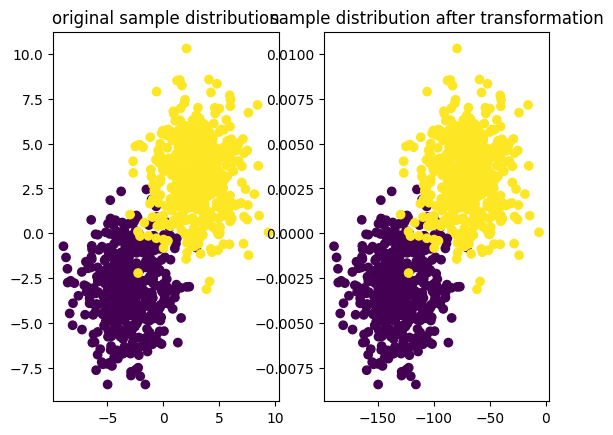

In [68]:
# 查看数据集中的样本点在特征空间中的分布情况
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("original sample distribution")
plt.subplot(122)
plt.scatter(X[:, 0]*10-100, X[:, 1]*0.001, c=y)
plt.title("sample distribution after transformation")
plt.show()

In [69]:
f = torch.arange(start=1, end=5, step=1, dtype=torch.float32).reshape(2, 2)
f

tensor([[1., 2.],
        [3., 4.]])

In [70]:
z_score_normalization(f)

tensor([[-0.7071, -0.7071],
        [ 0.7071,  0.7071]])

In [71]:
r = torch.tensor(1.) / f.std(dim=0)  # 第一个维度是to reduce的
r

tensor([0.7071, 0.7071])

In [ ]:
r.

In [74]:
r_mat = torch.diag(r)
r_mat

tensor([[0.7071, 0.0000],
        [0.0000, 0.7071]])

In [75]:
torch.mm(f, r_mat)

tensor([[0.7071, 1.4142],
        [2.1213, 2.8284]])

In [76]:
f / f.std(dim=0)

tensor([[0.7071, 1.4142],
        [2.1213, 2.8284]])

In [77]:
b = - f.mean(dim=0) / f.std(dim=0)
b

tensor([-1.4142, -2.1213])

In [78]:
torch.mm(f, r_mat) + b

tensor([[-0.7071, -0.7071],
        [ 0.7071,  0.7071]])

In [80]:
z_score_normalization(X=f)

tensor([[-0.7071, -0.7071],
        [ 0.7071,  0.7071]])